In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (5).csv


In [3]:
train_data = pd.read_csv('Titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (5).csv


In [5]:
test_data = pd.read_csv('Titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Removing NA values in train data set
train_data = train_data.dropna()
train_data.shape

(183, 12)

In [9]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [11]:
# Removing NA values in test data set
test_data = test_data.dropna()
test_data.shape

(87, 11)

In [12]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [15]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
# dropping the name column
train_data = train_data.drop('Name', axis=1)
test_data = test_data.drop('Name', axis=1)

In [17]:
train_data = pd.get_dummies(train_data, columns=['Sex'])
test_data = pd.get_dummies(test_data, columns=['Sex'])

In [18]:
train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])

In [19]:
train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

<ipython-input-20-d664c925dc58>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[f'Cabin_{cabin}'] = 0
<ipython-input-20-d664c925dc58>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[f'Cabin_{cabin}'] = 0
<ipython-input-20-d664c925dc58>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

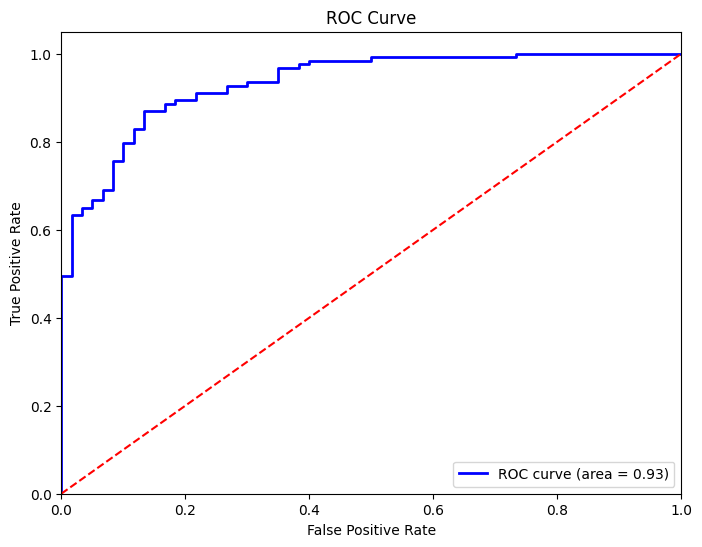

Predicted Probabilities for Test Data:
[0.98116137 0.94027603 0.94197216 0.98092841 0.58005631 0.76960512
 0.96667852 0.65185264 0.94591134 0.77871884 0.96610276 0.49346208
 0.98427638 0.88931496 0.77438005 0.75363289 0.79283002 0.98378526
 0.82257442 0.9456703  0.46649183 0.94212185 0.81618193 0.97521672
 0.73195314 0.97778878 0.94046803 0.95231981 0.76903767 0.98271313
 0.60869441 0.44530965 0.98529538 0.98320309 0.62100598 0.67850356
 0.66335198 0.92043083 0.89995987 0.75083136 0.98009108 0.98605978
 0.88873081 0.79356182 0.98306613 0.65031765 0.97223747 0.98204575
 0.82041129 0.62123552 0.96829552 0.73904237 0.70637843 0.88713916
 0.7410014  0.99193111 0.84558484 0.63033117 0.91205628 0.5029661
 0.55321251 0.97362753 0.7240193  0.76582062 0.82322088 0.99034128
 0.79453156 0.78257491 0.97346791 0.98185462 0.62211199 0.96133298
 0.9940752  0.99026326 0.62673438 0.96458892 0.59368879 0.85670496
 0.94893109 0.99150642 0.98305535 0.98821137 0.81102668 0.8679097
 0.76839599 0.96379373 0.

In [20]:
# Get a combined list of unique cabin values from both datasets
all_cabins = pd.concat([train_data['Cabin'], test_data['Cabin']]).unique()

# Create dummy variables for all cabins in both datasets
train_data = pd.get_dummies(train_data, columns=['Cabin'], dummy_na=False)
test_data = pd.get_dummies(test_data, columns=['Cabin'], dummy_na=False)

# Ensure both datasets have the same cabin columns
for cabin in all_cabins:
    if f'Cabin_{cabin}' not in train_data.columns:
        train_data[f'Cabin_{cabin}'] = 0
    if f'Cabin_{cabin}' not in test_data.columns:
        test_data[f'Cabin_{cabin}'] = 0

# Reorder columns to ensure consistency
train_data = train_data.reindex(sorted(train_data.columns), axis=1)
test_data = test_data.reindex(sorted(test_data.columns), axis=1)

# Now you can proceed with your model training and prediction
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test data
test_probabilities = model.predict_proba(test_data)[:, 1]

# Predict probabilities for the training data (for ROC curve calculation)
train_probabilities = model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, train_probabilities)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Output the predicted probabilities for the test data
print("Predicted Probabilities for Test Data:")
print(test_probabilities)